# 📈 Real-Time Crypto Market Analysis Pipeline
### *Automated Data Ingestion & Visualization via CoinMarketCap API*

---

**Author:** Billy  
**Objective:** To build a robust data pipeline that fetches, cleans, and visualizes live cryptocurrency market data. This dashboard identifies short-term volatility ("Movers and Shakers") and long-term market trends using localized data persistence.

---

## 🛠️ Phase 1: Data Ingestion
In this phase, I established a secure connection to the **CoinMarketCap API** to retrieve the latest market listings for the top 100 assets.

> **Note on Security:** For this public portfolio, the API Key has been removed. In a production environment, this is handled via environment variables or a `.env` file to ensure security.

In [1]:
#This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'PASTE_YOUR_API_KEY_HERE',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [3]:
import pandas as pd

# This allows you to see all the columns, not just the standard display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Phase 2: Data Normalization & Cleaning
> In this phase, I transform the raw nested JSON response into a flat Pandas DataFrame and perform initial data cleaning to ensure all numerical values are analysis-ready.

In [4]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2026-02-15T11:59:17.364Z,0,None,27,1,None,8846


In [5]:
#This normalizes the data makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])

# Add Timestamp for when the actual data was pulled
df['timestamp']= pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12561,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.998972e+07,1.998972e+07,False,1.404493e+12,NaN,1,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,70260.746357,3.985119e+10,4.9134,-0.265653,-0.232819,-0.918607,-26.340051,-19.160304,-26.397493,1.404493e+12,58.2714,1.475476e+12,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:17.481469
1,1027,Ethereum,ETH,ethereum,11567,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206925e+08,1.206925e+08,True,2.486935e+11,NaN,2,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,2060.555296,2.467652e+10,28.8100,-0.092041,-1.825829,-3.233289,-37.568302,-29.586103,-35.633874,2.486935e+11,10.3181,2.486935e+11,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:17.481469
2,825,Tether USDt,USDT,tether,171233,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.837553e+11,1.879648e+11,True,1.878709e+11,NaN,3,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,0.999500,8.682432e+10,13.3780,-0.011014,0.002962,0.028867,-0.010428,-0.034934,0.017753,1.836634e+11,7.6201,1.878709e+11,NaN,2026-02-15T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-15 05:59:17.481469
3,52,XRP,XRP,xrp,1798,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.091732e+10,9.998572e+10,False,1.564040e+11,NaN,4,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,1.564263,5.060533e+09,85.6345,-1.469107,6.627827,8.018610,-24.212119,-18.225795,-31.059653,9.529070e+10,3.9535,1.564263e+11,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:17.481469
4,1839,BNB,BNB,bnb,3134,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363593e+08,1.363593e+08,1.363593e+08,False,8.580210e+10,NaN,5,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,629.235397,1.418626e+09,-18.2939,-0.090790,-0.529777,-2.429862,-32.689784,-26.759713,-32.520338,8.580210e+10,3.5599,8.580210e+10,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:17.481469
5,3408,USDC,USDC,usd-coin,37474,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.358030e+10,7.358030e+10,False,7.357371e+10,NaN,6,6.090122e+10,6.089576e+10,NaN,2026-02-15T11:57:00.000Z,0.999910,8.058530e+09,-23.4036,-0.000022,0.002747,-0.002902,0.006720,0.001911,0.005350,7.357371e+10,3.0525,7.357371e+10,NaN,2026-02-15T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-15 05:59:17.481469
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.679577e+08,6.203912e+08,True,5.528353e+10,NaN,7,5.252369e+08,4.680426e+10,NaN,2026-02-15T11:57:00.000Z,89.110754,3.741090e+09,7.8066,-0.512366,2.275265,1.134353,-37.709182,-30.144672,-37.193150,5.061114e+10,2.0998,5.528353e+10,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:17.481469
7,1958,TRON,TRX,tron,1299,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.472463e+10,9.472463e+10,True,2.662042e+10,NaN,8,9.466789e+10,2.660448e+10,NaN,2026-02-15T11:58:00.000Z,0.281030,4.352363e+08,-25.8492,-0.008011,-0.911075,0.943174,-8.817817,0.587888,-4.308853,2.662042e+10,1.1056,2.662042e+10,NaN,2026-02-15T11:58

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9c6fe324881c4fd58f31b867d3b7147d',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp']= pd.to_datetime('now')
    #df = pd.concat([df, df2])
    df
    
    if not os.path.isfile('API.csv'):
        df.to_csv('API.csv', header='column_names')
    else:
        df.to_csv('API.csv', mode='a', header=False)
       

In [7]:
import os
from time import time
from time import sleep

# For the GitHub version, I only ran the collector once 
# to show the logic without trapping the user in a 333-minute loop.

for i in range(1):
    api_runner()
    print('API Runner completed successfully')
    # sleep(60)  <-- Add a # here so it doesn't make you wait

API Runner completed successfully


In [8]:
# Pulling the data back from our CSV to ensure we have the full dataset for analysis
df_all_data = pd.read_csv('API.csv')

# If you want your visuals to use the CSV data instead of the live API pull, 
# just make sure your Phase 3/4 code uses 'df_all_data'

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12561,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.998972e+07,1.998972e+07,False,1.404493e+12,NaN,1,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,70260.746357,3.985119e+10,4.9134,-0.265653,-0.232819,-0.918607,-26.340051,-19.160304,-26.397493,1.404493e+12,58.2714,1.475476e+12,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
1,1027,Ethereum,ETH,ethereum,11567,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206925e+08,1.206925e+08,True,2.486935e+11,NaN,2,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,2060.555296,2.467652e+10,28.8100,-0.092041,-1.825829,-3.233289,-37.568302,-29.586103,-35.633874,2.486935e+11,10.3181,2.486935e+11,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
2,825,Tether USDt,USDT,tether,171233,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.837553e+11,1.879648e+11,True,1.878709e+11,NaN,3,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,0.999500,8.682432e+10,13.3780,-0.011014,0.002962,0.028867,-0.010428,-0.034934,0.017753,1.836634e+11,7.6201,1.878709e+11,NaN,2026-02-15T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-15 05:59:18.223119
3,52,XRP,XRP,xrp,1798,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.091732e+10,9.998572e+10,False,1.564040e+11,NaN,4,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,1.564263,5.060533e+09,85.6345,-1.469107,6.627827,8.018610,-24.212119,-18.225795,-31.059653,9.529070e+10,3.9535,1.564263e+11,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
4,1839,BNB,BNB,bnb,3134,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363593e+08,1.363593e+08,1.363593e+08,False,8.580210e+10,NaN,5,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,629.235397,1.418626e+09,-18.2939,-0.090790,-0.529777,-2.429862,-32.689784,-26.759713,-32.520338,8.580210e+10,3.5599,8.580210e+10,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
5,3408,USDC,USDC,usd-coin,37474,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.358030e+10,7.358030e+10,False,7.357371e+10,NaN,6,6.090122e+10,6.089576e+10,NaN,2026-02-15T11:57:00.000Z,0.999910,8.058530e+09,-23.4036,-0.000022,0.002747,-0.002902,0.006720,0.001911,0.005350,7.357371e+10,3.0525,7.357371e+10,NaN,2026-02-15T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-15 05:59:18.223119
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.679577e+08,6.203912e+08,True,5.528353e+10,NaN,7,5.252369e+08,4.680426e+10,NaN,2026-02-15T11:57:00.000Z,89.110754,3.741090e+09,7.8066,-0.512366,2.275265,1.134353,-37.709182,-30.144672,-37.193150,5.061114e+10,2.0998,5.528353e+10,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
7,1958,TRON,TRX,tron,1299,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.472463e+10,9.472463e+10,True,2.662042e+10,NaN,8,9.466789e+10,2.660448e+10,NaN,2026-02-15T11:58:00.000Z,0.281030,4.352363e+08,-25.8492,-0.008011,-0.911075,0.943174,-8.817817,0.587888,-4.308853,2.662042e+10,1.1056,2.662042e+10,NaN,2026-02-15T11:58

# Phase 3: Exploratory Data Analysis (EDA)
> Now that the data is cleaned and normalized, I am performing an initial exploration to understand market distribution, total asset counts, and general price trends.

In [10]:
# Updated to match the new portable file path
df22 = pd.read_csv('API.csv')
df22

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12561,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.998972e+07,1.998972e+07,False,1.406264e+12,NaN,1,NaN,NaN,NaN,2026-02-15T11:31:00.000Z,70349.363198,4.004920e+10,6.4702,-0.039121,0.279167,-0.570966,-26.181456,-18.936459,-26.478353,1.406264e+12,58.3000,1.477337e+12,NaN,2026-02-15T11:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:33:20.169198
1,1,1027,Ethereum,ETH,ethereum,11567,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206925e+08,1.206925e+08,True,2.487511e+11,NaN,2,NaN,NaN,NaN,2026-02-15T11:31:00.000Z,2061.032565,2.476911e+10,31.0242,-0.020693,-1.612386,-2.802413,-37.524194,-29.581908,-35.780086,2.487511e+11,10.3126,2.487511e+11,NaN,2026-02-15T11:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:33:20.169198
2,2,825,Tether USDt,USDT,tether,171233,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.837553e+11,1.879648e+11,True,1.878756e+11,NaN,3,NaN,NaN,NaN,2026-02-15T11:31:00.000Z,0.999525,8.723465e+10,15.1702,-0.009590,-0.014744,0.004829,-0.008895,-0.021690,0.020383,1.836680e+11,7.6144,1.878756e+11,NaN,2026-02-15T11:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-15 05:33:20.169198
3,3,52,XRP,XRP,xrp,1798,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,6.091732e+10,9.998572e+10,False,1.583303e+11,NaN,4,NaN,NaN,NaN,2026-02-15T11:31:00.000Z,1.583529,5.031334e+09,88.2681,-0.482268,7.967648,9.940602,-23.239637,-17.084894,-30.298094,9.646435e+10,3.9992,1.583529e+11,NaN,2026-02-15T11:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:33:20.169198
4,4,1839,BNB,BNB,bnb,3134,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",1.363593e+08,1.363593e+08,1.363593e+08,False,8.589556e+10,NaN,5,NaN,NaN,NaN,2026-02-15T11:31:00.000Z,629.920790,1.429730e+09,-17.2216,0.194215,-0.285086,-1.882579,-32.542265,-26.682461,-32.683276,8.589556e+10,3.5610,8.589556e+10,NaN,2026-02-15T11:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:33:20.169198
5,5,3408,USDC,USDC,usd-coin,37474,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,7.358203e+10,7.358203e+10,False,7.357662e+10,NaN,6,6.090122e+10,6.089674e+10,NaN,2026-02-15T11:31:00.000Z,0.999926,8.094334e+09,-23.6150,-0.004913,0.007086,-0.011158,0.012007,0.011522,-0.012985,7.357662e+10,3.0503,7.357662e+10,NaN,2026-02-15T11:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-15 05:33:20.169198
6,6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,5.679577e+08,6.203912e+08,True,5.542942e+10,NaN,7,5.252369e+08,4.692777e+10,NaN,2026-02-15T11:31:00.000Z,89.345916,3.785292e+09,10.4518,-0.011970,2.992759,2.037365,-37.540244,-29.829375,-37.233725,5.074470e+10,2.1037,5.542942e+10,NaN,2026-02-15T11:31:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:33:20.169198
7,7,1958,TRON,TRX,tron,1299,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,9.472461e+10,9.472461e+10,True,2.662330e+10,NaN,8,9.466789e+10,2.660735e+10,NaN,2026-02-15T11:32:00.000Z,0.281060,4.432752e+08,-23.5696,0.030166,-0.798138,1.054282,-8.435191,0.627593,-4.299855,2.662330e+10,1.1037,2.6623

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12561,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.998972e+07,1.998972e+07,False,1.404493e+12,NaN,1,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,70260.746357,3.985119e+10,4.9134,-0.265653,-0.232819,-0.918607,-26.340051,-19.160304,-26.397493,1.404493e+12,58.2714,1.475476e+12,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
1,1027,Ethereum,ETH,ethereum,11567,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206925e+08,1.206925e+08,True,2.486935e+11,NaN,2,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,2060.555296,2.467652e+10,28.8100,-0.092041,-1.825829,-3.233289,-37.568302,-29.586103,-35.633874,2.486935e+11,10.3181,2.486935e+11,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
2,825,Tether USDt,USDT,tether,171233,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.837553e+11,1.879648e+11,True,1.878709e+11,NaN,3,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,0.999500,8.682432e+10,13.3780,-0.011014,0.002962,0.028867,-0.010428,-0.034934,0.017753,1.836634e+11,7.6201,1.878709e+11,NaN,2026-02-15T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2026-02-15 05:59:18.223119
3,52,XRP,XRP,xrp,1798,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.091732e+10,9.998572e+10,False,1.564040e+11,NaN,4,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,1.564263,5.060533e+09,85.6345,-1.469107,6.627827,8.018610,-24.212119,-18.225795,-31.059653,9.529070e+10,3.9535,1.564263e+11,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
4,1839,BNB,BNB,bnb,3134,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.363593e+08,1.363593e+08,1.363593e+08,False,8.580210e+10,NaN,5,NaN,NaN,NaN,2026-02-15T11:57:00.000Z,629.235397,1.418626e+09,-18.2939,-0.090790,-0.529777,-2.429862,-32.689784,-26.759713,-32.520338,8.580210e+10,3.5599,8.580210e+10,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
5,3408,USDC,USDC,usd-coin,37474,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.358030e+10,7.358030e+10,False,7.357371e+10,NaN,6,6.090122e+10,6.089576e+10,NaN,2026-02-15T11:57:00.000Z,0.999910,8.058530e+09,-23.4036,-0.000022,0.002747,-0.002902,0.006720,0.001911,0.005350,7.357371e+10,3.0525,7.357371e+10,NaN,2026-02-15T11:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2026-02-15 05:59:18.223119
6,5426,Solana,SOL,solana,1089,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.679577e+08,6.203912e+08,True,5.528353e+10,NaN,7,5.252369e+08,4.680426e+10,NaN,2026-02-15T11:57:00.000Z,89.110754,3.741090e+09,7.8066,-0.512366,2.275265,1.134353,-37.709182,-30.144672,-37.193150,5.061114e+10,2.0998,5.528353e+10,NaN,2026-02-15T11:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2026-02-15 05:59:18.223119
7,1958,TRON,TRX,tron,1299,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.472463e+10,9.472463e+10,True,2.662042e+10,NaN,8,9.466789e+10,2.660448e+10,NaN,2026-02-15T11:58:00.000Z,0.281030,4.352363e+08,-25.8492,-0.008011,-0.911075,0.943174,-8.817817,0.587888,-4.308853,2.662042e+10,1.1056,2.662042e+10,NaN,2026-02-15T11:58

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only = True)
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.26565,-0.23282,-0.91861,-26.34005,-19.16030,-26.39749
Ethereum,-0.09204,-1.82583,-3.23329,-37.56830,-29.58610,-35.63387
Tether USDt,-0.01101,0.00296,0.02887,-0.01043,-0.03493,0.01775
XRP,-1.46911,6.62783,8.01861,-24.21212,-18.22579,-31.05965
BNB,-0.09079,-0.52978,-2.42986,-32.68978,-26.75971,-32.52034
USDC,-0.00002,0.00275,-0.00290,0.00672,0.00191,0.00535
Solana,-0.51237,2.27527,1.13435,-37.70918,-30.14467,-37.19315
TRON,-0.00801,-0.91107,0.94317,-8.81782,0.58789,-4.30885
Dogecoin,-0.74772,11.89244,14.75531,-18.27558,-13.46957,-30.40724


In [14]:
df4 = df3.stack()
df4

name                                                               
Bitcoin                                quote.USD.percent_change_1h      -0.26565
                                       quote.USD.percent_change_24h     -0.23282
                                       quote.USD.percent_change_7d      -0.91861
                                       quote.USD.percent_change_30d    -26.34005
                                       quote.USD.percent_change_60d    -19.16030
                                       quote.USD.percent_change_90d    -26.39749
Ethereum                               quote.USD.percent_change_1h      -0.09204
                                       quote.USD.percent_change_24h     -1.82583
                                       quote.USD.percent_change_7d      -3.23329
                                       quote.USD.percent_change_30d    -37.56830
                                       quote.USD.percent_change_60d    -29.58610
                                       qu

In [15]:
type(df3)

pandas.core.frame.DataFrame

In [16]:
type(df4)

pandas.core.series.Series

In [17]:
df5 = df4.to_frame(name='values')
df5

values
name                                                                         
Bitcoin                               quote.USD.percent_change_1h    -0.26565
                                      quote.USD.percent_change_24h   -0.23282
                                      quote.USD.percent_change_7d    -0.91861
                                      quote.USD.percent_change_30d  -26.34005
                                      quote.USD.percent_change_60d  -19.16030
                                      quote.USD.percent_change_90d  -26.39749
Ethereum                              quote.USD.percent_change_1h    -0.09204
                                      quote.USD.percent_change_24h   -1.82583
                                      quote.USD.percent_change_7d    -3.23329
                                      quote.USD.percent_change_30d  -37.56830
                                      quote.USD.percent_change_60d  -29.58610
                                      quote.USD.percent_change_90d  -35.63387
Tether USDt                           quote.USD.percent_change_1h    -0.01101
                                      quote.USD.percent_change_24h    0.00296
                                      quote.USD.percent_change_7d     0.02887
                                      quote.USD.percent_change_30d   -0.01043
                                      quote.USD.percent_change_60d   -0.03493
                                      quote.USD.percent_change_90d    0.01775
XRP                                   quote.USD.percent_change_1h    -1.46911
                                      quote.USD.percent_change_24h    6.62783
                                      quote.USD.percent_change_7d     8.01861
                                      quote.USD.percent_change_30d  -24.21212
                                      quote.USD.percent_change_60d  -18.22579
                                      quote.USD.percent_change_90d  -31.05965
BNB                                   quote.USD.percent_change_1h    -0.09079
                                      quote.USD.percent_change_24h   -0.52978
                                      quote.USD.percent_change_7d    -2.42986
                                      quote.USD.percent_change_30d  -32.68978
                                      quote.USD.percent_change_60d  -26.75971
                                      quote.USD.percent_change_90d  -32.52034
USDC                                  quote.USD.percent_change_1h    -0.00002
                                      quote.USD.percent_change_24h    0.00275
                                      quote.USD.percent_change_7d    -0.00290
                                      quote.USD.percent_change_30d    0.00672
                                      quote.USD.percent_change_60d    0.00191
                                      quote.USD.percent_change_90d    0.00535
Solana                                quote.USD.percent_change_1h    -0.51237
                                      quote.USD.percent_change_24h    2.27527
                                      quote.USD.percent_change_7d     1.13435
                                      quote.USD.percent_change_30d  -37.70918
                                      quote.USD.percent_change_60d  -30.14467
                                      quote.USD.percent_change_90d  -37.19315
TRON                                  quote.USD.percent_change_1h    -0.00801
                                      quote.USD.percent_change_24h   -0.91107
                                      quote.USD.percent_change_7d     0.94317
                                      quote.USD.percent_change_30d   -8.81782
                                      quote.USD.percent_change_60d    0.58789
                                      quote.USD.percent_change_90d   -4.30885
Dogecoin                              quote.USD.percent_change_1h    -0.74772
                                      quote.USD.percent_change_24h   11.89244
               

In [18]:
df5.count()

values    600
dtype: int64

In [19]:
index = pd.Index(range(600))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26565
1,Bitcoin,quote.USD.percent_change_24h,-0.23282
2,Bitcoin,quote.USD.percent_change_7d,-0.91861
3,Bitcoin,quote.USD.percent_change_30d,-26.34005
4,Bitcoin,quote.USD.percent_change_60d,-19.16030
5,Bitcoin,quote.USD.percent_change_90d,-26.39749
6,Ethereum,quote.USD.percent_change_1h,-0.09204
7,Ethereum,quote.USD.percent_change_24h,-1.82583
8,Ethereum,quote.USD.percent_change_7d,-3.23329
9,Ethereum,quote.USD.percent_change_30d,-37.56830


In [20]:
df7 = df6.rename(columns={'level_1':'percent_change'})
df7.head(60)

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.26565
1,Bitcoin,quote.USD.percent_change_24h,-0.23282
2,Bitcoin,quote.USD.percent_change_7d,-0.91861
3,Bitcoin,quote.USD.percent_change_30d,-26.34005
4,Bitcoin,quote.USD.percent_change_60d,-19.16030
5,Bitcoin,quote.USD.percent_change_90d,-26.39749
6,Ethereum,quote.USD.percent_change_1h,-0.09204
7,Ethereum,quote.USD.percent_change_24h,-1.82583
8,Ethereum,quote.USD.percent_change_7d,-3.23329
9,Ethereum,quote.USD.percent_change_30d,-37.56830


In [21]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7.head(60)

,name,percent_change,values
0,Bitcoin,1h,-0.26565
1,Bitcoin,24h,-0.23282
2,Bitcoin,7d,-0.91861
3,Bitcoin,30d,-26.34005
4,Bitcoin,60d,-19.16030
5,Bitcoin,90d,-26.39749
6,Ethereum,1h,-0.09204
7,Ethereum,24h,-1.82583
8,Ethereum,7d,-3.23329
9,Ethereum,30d,-37.56830


## 📊 Phase 4: Visual Storytelling & Insights

In this final phase, I transition from data transformation to visual analysis. By utilizing **Seaborn** and **Matplotlib**, I have created three distinct views of the market to provide a comprehensive overview of current sentiment.

---

### 1. Market Volatility & Trend Analysis (The "Spaghetti" Plot)
Using a `catplot`, I've mapped the Top 10 coins by market cap to visualize their price movement over 1h, 24h, 7d, 30d, 60d, and 90d intervals. This helps identify if the market is moving in "correlation" or if certain assets are diverging from the pack.

### 2. High-Value Asset Tracking (Bitcoin Spot Price)
To provide a quick "KPI" (Key Performance Indicator) for the dashboard, I isolated Bitcoin's specific price and timestamp. This provides an immediate reference point for the market's health before diving into the altcoin data.

### 3. Market Sentiment Heatmap
The heatmap offers a high-density view of the top 20 movers. By capping the color scale (`vmax=50`), we ensure that extreme outliers don't hide the subtle movements of more stable assets.

In [22]:
import seaborn as sns
import matplotlib as plt

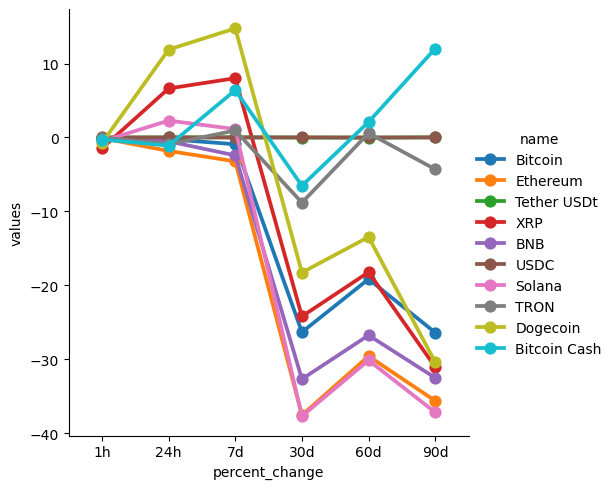

In [23]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7.head(60), kind='point')

In [24]:
df9= df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,70260.74636,2026-02-15 05:59:18.223119


In [25]:
from IPython.display import Markdown

# Get the price from your df9
btc_price = df9['quote.USD.price'].values[0]

# Display as a Large "Card"
display(Markdown(f"# 🪙 Bitcoin Current Price: `${btc_price:,.2f}`"))

# 🪙 Bitcoin Current Price: `$70,260.75`

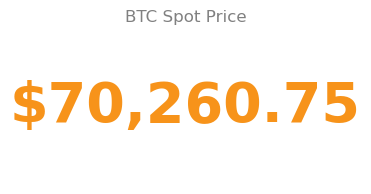

In [26]:
import matplotlib.pyplot as plt

# Get the price
btc_price = df9['quote.USD.price'].values[0]

# Create a small blank "Card"
fig, ax = plt.subplots(figsize=(4, 2))
ax.text(0.5, 0.5, f"${btc_price:,.2f}", 
        fontsize=40, fontweight='bold', ha='center', va='center', color='#F7931A')

# Remove borders and axes to make it look like a Card
ax.axis('off')
plt.title('BTC Spot Price', fontsize=12, color='gray')
plt.show()

### 📊 Movers & Shakers

In [27]:
# Filtering for high volatility (>10% or < -10% in 24h)
# Assuming df is your original wide-format dataframe
df_volatile = df[(df['quote.USD.percent_change_24h'] > 10) | (df['quote.USD.percent_change_24h'] < -10)]

# Displaying the "Movers and Shakers"
print(f"Found {len(df_volatile)} high-volatility coins.")
df_volatile[['name', 'quote.USD.percent_change_24h']]

Found 6 high-volatility coins.


,name,quote.USD.percent_change_24h
8,Dogecoin,11.89244
37,Pepe,18.82901
41,Pi,15.51571
74,Humanity Protocol,16.06847
81,MYX Finance,-16.08339
92,Kite,13.83807


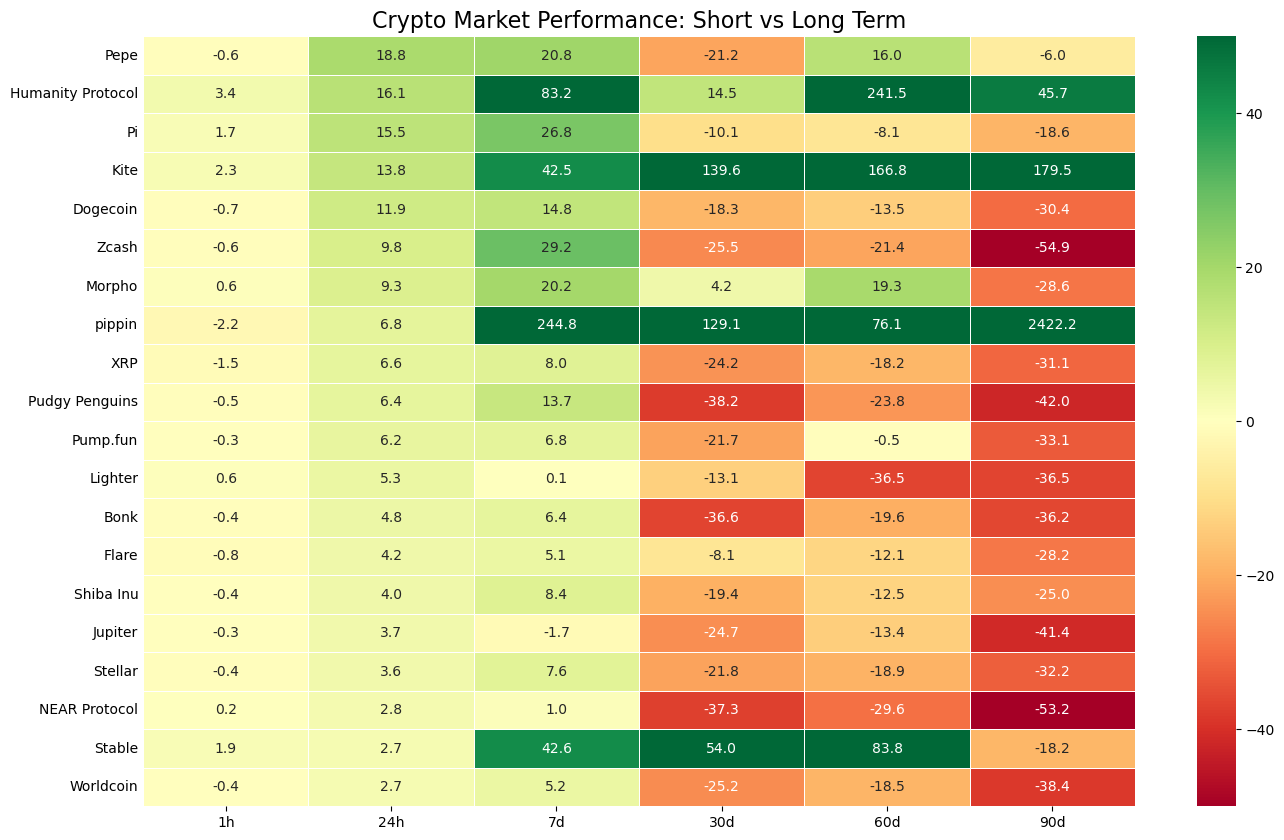

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pull the columns we want (Adding back 30, 60, and 90 day metrics)
columns_to_keep = [
    'name', 
    'quote.USD.percent_change_1h', 
    'quote.USD.percent_change_24h', 
    'quote.USD.percent_change_7d',
    'quote.USD.percent_change_30d',
    'quote.USD.percent_change_60d',
    'quote.USD.percent_change_90d'
]

# 2. Clean up duplicates (Keeps only the latest data pull for each coin)
df_heatmap = df_all_data[columns_to_keep].copy()
df_heatmap = df_heatmap.drop_duplicates(subset=['name'], keep='last')

# 3. Rename for the professional "Card" look
df_heatmap = df_heatmap.rename(columns={
    'quote.USD.percent_change_1h': '1h',
    'quote.USD.percent_change_24h': '24h',
    'quote.USD.percent_change_7d': '7d',
    'quote.USD.percent_change_30d': '30d',
    'quote.USD.percent_change_60d': '60d',
    'quote.USD.percent_change_90d': '90d'
})

# 4. Set Index and Sort
df_heatmap = df_heatmap.set_index('name')
df_heatmap = df_heatmap.sort_values(by='24h', ascending=False)

# 5. Plotting
plt.figure(figsize=(16, 10))

# Create the heatmap
sns.heatmap(df_heatmap.head(20), 
            annot=True, 
            fmt=".1f", 
            cmap='RdYlGn', 
            center=0, 
            vmax=50, 
            vmin=-50, 
            linewidths=0.5, 
            linecolor='white')

# --- THE FIX IS HERE ---
plt.tick_params(axis='y', length=0) # This removes the little dash/tick marks
# -----------------------

plt.title('Crypto Market Performance: Short vs Long Term', fontsize=16)
plt.ylabel('') # Optional: Removing the 'name' label makes it even cleaner
plt.show()

# 🏁 Project Summary & Insights

This project serves as an automated data pipeline for cryptocurrency market analysis. By integrating the **CoinMarketCap API**, I’ve built a system that handles:

* **Data Ingestion:** Automated pulls of the top 100 cryptocurrencies.
* **Data Persistence:** Storing historical snapshots in a local `API.csv` for longitudinal study.
* **Cleaning & Transformation:** Normalizing JSON data, handling duplicates, and filtering for high-volatility assets.
* **Visual Analytics:** A custom-built **Heatmap** that tracks performance from 1 hour up to 90 days.

---

## 🔍 Current Market Observations

* **Top Performer:** **Pippin** is showing an outlier growth of **2422.2%** over the last 90 days.
* **Strongest Momentum:** **Kite** and **Humanity Protocol** show consistent "Full Green" status across all timeframes.
* **Market Activity:** Identified **6 coins** with >10% moves in 24h, indicating a high-volatility session.